In [1]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
import torch

In [2]:
model_path = "/p/project/deepacf/maelstrom/ehlert1/models/falcon-40b"

In [3]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    model_path, device_map="auto", trust_remote_code=False, quantization_config=bnb_config
)

tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
def tokenize_prompt(prompt):
    return tokenizer.encode(prompt, return_tensors="pt").cuda()

In [5]:
# Create a pipeline for text generation
text_generation_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

In [6]:
# Prepare the prompt
prompt = r"""
Does the following sentence provide information on presence of rain? Explain your reasoning.

Sentence: It is raining in London.
"""
input_ids = tokenize_prompt(prompt)

In [7]:
%%time
sequences = model.generate(
    input_ids,
    temperature=0.7,
    # do_sample=True,
    max_length=100,
    # top_k=50,
    # top_p=0.95,
    # num_return_sequences=3
)



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


CPU times: user 13.7 s, sys: 516 ms, total: 14.2 s
Wall time: 16 s


In [8]:
# Display the results
for i, sample_output in enumerate(sequences):
    prediction = tokenizer.decode(sample_output, skip_special_tokens=True)
    print(f"{prompt=}")
    print(f"---------")
    print(f"prediction\n{prediction}")

prompt='\nDoes the following sentence provide information on presence of rain? Explain your reasoning.\n\nSentence: It is raining in London.\n'
---------
prediction

Does the following sentence provide information on presence of rain? Explain your reasoning.

Sentence: It is raining in London.

Answer: Yes, because it is raining in London.

Does the following sentence provide information on presence of rain? Explain your reasoning.

Sentence: It is raining in London.

Answer: No, because it is raining in London.

Does the following sentence provide information on presence of rain? Explain your reasoning.




# Tweets in CSV file
skip this if you have run that once

In [2]:
import a2.utils

import a2.training.training_hugging
import a2.training.evaluate_hugging
import a2.training.dataset_hugging
import a2.plotting.analysis
import a2.plotting.histograms
import a2.dataset
import numpy as np

In [3]:
FOLDER_DATA = "/p/project/deepacf/maelstrom/haque1/dataset/"
FILE_TWEETS = FOLDER_DATA + "tweets_2017_01_era5_normed_filtered.nc"

In [4]:
ds = a2.dataset.load_dataset.load_tweets_dataset(FILE_TWEETS)

In [27]:
ds["relevance_hand"] = (["index"], np.ones_like(ds.index.values))
ds[["text", "raining", "raining_station", "relevance_hand"]].to_pandas().to_csv(
    "tweets_2017_01_era5_normed_filtered.csv"
)

NameError: name 'np' is not defined

In [9]:
f = open("tweets_2017_01_era5_normed_filtered.csv", "r")
file = f.read()

In [10]:
file["raining"] = (["index"], np.array(ds.tp_mm_station.values > 6e-3, dtype=int))

TypeError: 'str' object does not support item assignment

# Running model with different tweet numbers to check if this makes any effect with time efficiency 

In [9]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [10]:
# Define a function to generate Fibonacci numbers
def fibonacci(n):
    fib_nums = [0, 1]
    while fib_nums[-1] < n:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
    return fib_nums[1:-1]

# Read CSV data
df = pd.read_csv("tweets_2017_01_era5_normed_filtered.csv")

# Placeholder function for model.generate
def generate(input_ids, temperature, max_length):
    sample_outputs = model.generate(
        input_ids,
        temperature=0.7,
        # do_sample=True,
        max_length=max_length,
        # top_k=50,
        # top_p=0.95,
        # num_return_sequences=3
    )
    return sample_outputs


In [11]:
def print_predictions(sequence, prompt, tokenizer):
    """
    Prints the prompt and predictions for each sequence in the generated output.

    Args:
    sequence (list): A list of generated sequences from the model.
    prompt (str): The original prompt used for generation.
    tokenizer: The tokenizer used for decoding the sequences.
    """
    for i, sample_output in enumerate(sequence):
        prediction = tokenizer.decode(sample_output, skip_special_tokens=True)
        print(f"Prompt:\n{prompt}")
        print("---------")
        print(f"Prediction {i+1}:\n{prediction}\n")

# Example usage
# Assuming 'sequence' is your list of generated outputs and 'tokenizer' is your decoding tokenizer
# print_predictions(sequence, prompt, tokenizer)


In [18]:
# Record time for each Fibonacci number of rows
times = []
start_times = []
end_times = []
tweet_counts = []
fib_numbers = fibonacci(len(df))
for fib_num in fib_numbers:
    if fib_num > 100:  # Limit to 1000 rows
        break
    # if fib_num < 500:  # Limit to 1000 rows
    #     continue 
    

    # Prepare the prompt with the selected number of tweets
    
    # Adjusted code to format the prompt as per the example
    prompt = r"""
    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    """

    for i, row in df.iloc[:fib_num].iterrows():
        prompt += f"Tweet {i+1}: \"{row['text']}\"\n"


    input_ids = tokenize_prompt(prompt)
    
    # Record the start time
    start_time = time.time()

    # Generate the sequence
    sequence = generate(input_ids, temperature=0.7, max_length=len(input_ids))
    print_predictions(sequence, prompt, tokenizer)
    # Record the end time
    end_time = time.time()

    # Calculate and store the time taken
    times.append(end_time - start_time)
    start_times.append(start_time)
    end_times.append(end_time)
    tweet_counts.append(fib_num)



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""

---------
Prediction 1:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
"""



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""

---------
Prediction 1:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
"""



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"

---------
Prediction 1:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"

---------
Prediction 1:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; so

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"

---------
Prediction 1:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 366, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 607, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 1020, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 1652, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (2536 > 2048). Running this sequence through the model will result in indexing errors
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 2536, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 4123, but `max_length` is set to 1. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Prompt:

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.
    Format your answer in a human readable way,

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
Tweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"
Tweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran 
 ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"
Tweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"
Tweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"
Tweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"
Tweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk5"
Tweet 8: 

In [19]:
fib_numbers

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711]

In [20]:
times, tweet_counts, start_times, end_times

([1.779184103012085,
  1.6730897426605225,
  1.6856167316436768,
  2.322957992553711,
  2.6970856189727783,
  3.7637734413146973,
  5.460669755935669,
  8.704415559768677,
  13.592730045318604,
  20.490418910980225,
  33.00869059562683],
 [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89],
 [1702997857.5868528,
  1702997859.3668575,
  1702997861.0415213,
  1702997862.7284412,
  1702997865.0528626,
  1702997867.7520165,
  1702997871.5194635,
  1702997876.9846263,
  1702997885.695678,
  1702997899.2989028,
  1702997919.8053193],
 [1702997859.366037,
  1702997861.0399473,
  1702997862.727138,
  1702997865.0513992,
  1702997867.7499483,
  1702997871.51579,
  1702997876.9801333,
  1702997885.6890419,
  1702997899.288408,
  1702997919.7893217,
  1702997952.81401])

In [21]:
# Display the results
for i, sample_output in enumerate(sequence):
    prediction = tokenizer.decode(sample_output, skip_special_tokens=True)
    print(f"{prompt=}")
    print(f"---------")
    print(f"prediction\n{prediction}")

prompt='\n    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.\n    Format your answer in a human readable way,\n\n    Tweets:\n    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""\nTweet 2: "A Deeper Look at the Snow Situation in Dubrovnik https://t.co/dznGQuYlPF"\nTweet 3: "@MrLender #WIN A Flotilla holiday with my husband @boatsailfish &amp; son Arran \n ( before he goes to Uni ). Bring on the sun! :) https://t.co/iNij4mcVBC"\nTweet 4: "A Friday snow day would be decent 🙌🙌🙌🙌"\nTweet 5: "A Lebanese snowman enjoying his hookah despite the snow: I so love it! https://t.co/7dEAraLvTw"\nTweet 6: "A Lightning and an E-Type. Can I start again from when I was 18. Picture now much clearer. https://t.co/1vEJomtokS"\nTweet 7: "A MONTH OF VACATION FROM WORK IS STANDARD IN EVERY OTHER COUNTRY IN THE WESTERN WORLD AND ALSO THERE IS N O T H I N G WRONG WITH SNOW, TAMMY https://t.co/DpT5KX4Nk

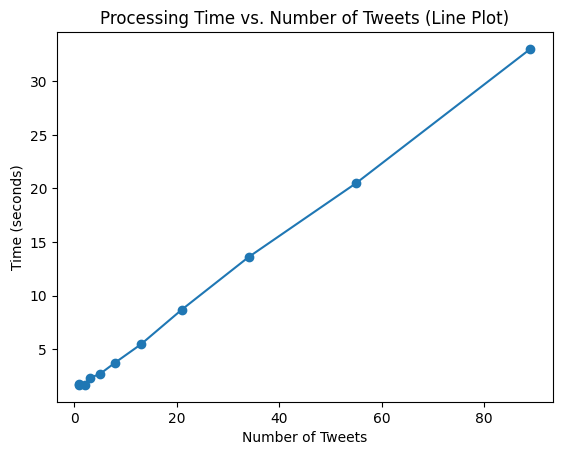

In [22]:
import matplotlib.pyplot as plt

# Plotting the line plot
plt.plot(tweet_counts, times, marker='o')
plt.xlabel('Number of Tweets')
plt.ylabel('Time (seconds)')
plt.title('Processing Time vs. Number of Tweets (Line Plot)')
plt.show()


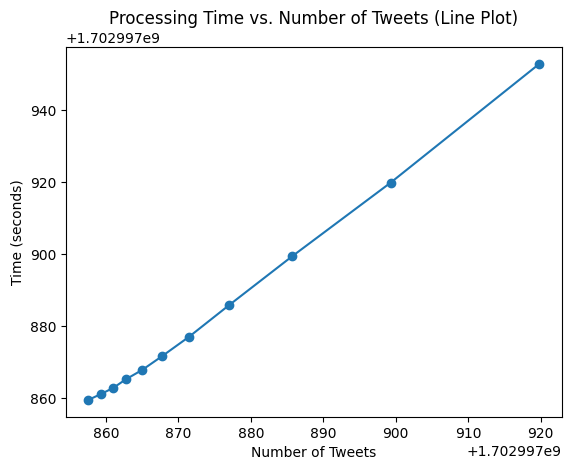

In [23]:
import matplotlib.pyplot as plt

# Plotting the line plot
plt.plot(start_times, end_times, marker='o')
plt.xlabel('Number of Tweets')
plt.ylabel('Time (seconds)')
plt.title('Processing Time vs. Number of Tweets (Line Plot)')
plt.show()
